<a href="https://colab.research.google.com/github/Kehindeajayi01/Workshops/blob/master/KNearestNeighborsClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Get the data and split into training and testing set

In [2]:
!pip install mglearn

     |████████████████████████████████| 542kB 2.9MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.7-py2.py3-none-any.whl size=582705 sha256=b12a9b55acd08231bdc941a3580239c3de1e3d660c44880100e96e6bb881c245
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


In [5]:
import mglearn
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


## Explore the data
* Check the keys (what is contained in the data) of the data
* Examine the shape
* etc

In [6]:
X_train.shape, X_test.shape

((19, 2), (7, 2))

## Train a simple Knn Classifier

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
print("Test prediction: \n{}".format(knn.predict(X_test)))

Test prediction: 
[1 0 1 0 1 0 0]


## Evaluate the Model's Performance
* We see that our model was 86% accurate on the new data. This means that our model is predicted to correctly classify the label for new data 86% of the time.

In [10]:
print("Test Accuracy: {:.3f}".format(knn.score(X_test, y_test)))

Test Accuracy: 0.857


## Analyzing KNeighborsClassifier
* Visualizing the decision boundaries for 1 , 3 and 9 neighbors.
* From the plots below, we can see that a single neighbor results in a decision boundary that follows the data closely. As more and more neighbors are considered a smoother boundary is obtained and a smoother boundary corresponds to a simpler model. In other words, using few neighbors corresponds to high model complexity.

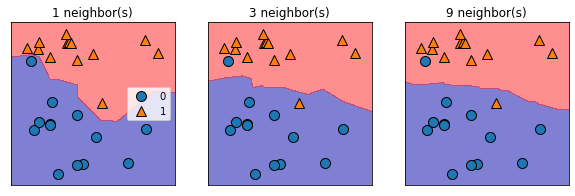

In [14]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize = (10,3))

for n_neighbors, ax in zip([1,3,9], axes):
  knn = KNeighborsClassifier(n_neighbors=n_neighbors)
  knn.fit(X,y)
  mglearn.plots.plot_2d_separator(knn, X, fill = True, alpha = 0.5, eps = 0.5, ax = ax)
  mglearn.discrete_scatter(X[:,0],X[:,1], y, ax = ax)
  ax.set_label('feature 0')
  ax.set_label('feature 1')
  ax.set_title("{} neighbor(s)".format(n_neighbors))
axes[0].legend(loc = 'best')

## Examining the connection between Model complexity and Generalization
* To do this, we use the real-world Breast Cancer dataset. Then we plot the model's accuracies (training and test accuracy) for 1 to 10 neighbors. 

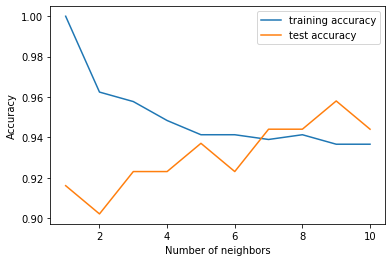

In [15]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

training_accuracy = []
test_accuracy = []
neighbors_setting = range(1,11)

for n_neighbors in neighbors_setting:
  knn = KNeighborsClassifier(n_neighbors=n_neighbors)
  knn.fit(X_train, y_train)
  training_accuracy.append(knn.score(X_train, y_train))
  test_accuracy.append(knn.score(X_test, y_test))

import matplotlib.pyplot as plt
plt.plot(neighbors_setting, training_accuracy, label = "training accuracy")
plt.plot(neighbors_setting, test_accuracy, label = "test accuracy")
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.legend(loc = 'best')